# <font color='red'>COPY THIS FILE TO THE ROOT OF THE UPLOAD, AND RENAME IT.</font>

## Template for loading Static_ARPES data from the Phoibos detector at FHI Berlin.
The data are loaded as igor_binarywave and converted to xarray

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import ipywidgets as widgets
from ipywidgets import interact
from igor2 import binarywave
from pathlib import Path
from helpers import static_analysis

In [2]:
sp=static_analysis()

In [3]:
datapath="//nap32/topfloor/StaticARPES/Data/ARPES/2026/202601/20260123/"
run=11
name="WSe2_"

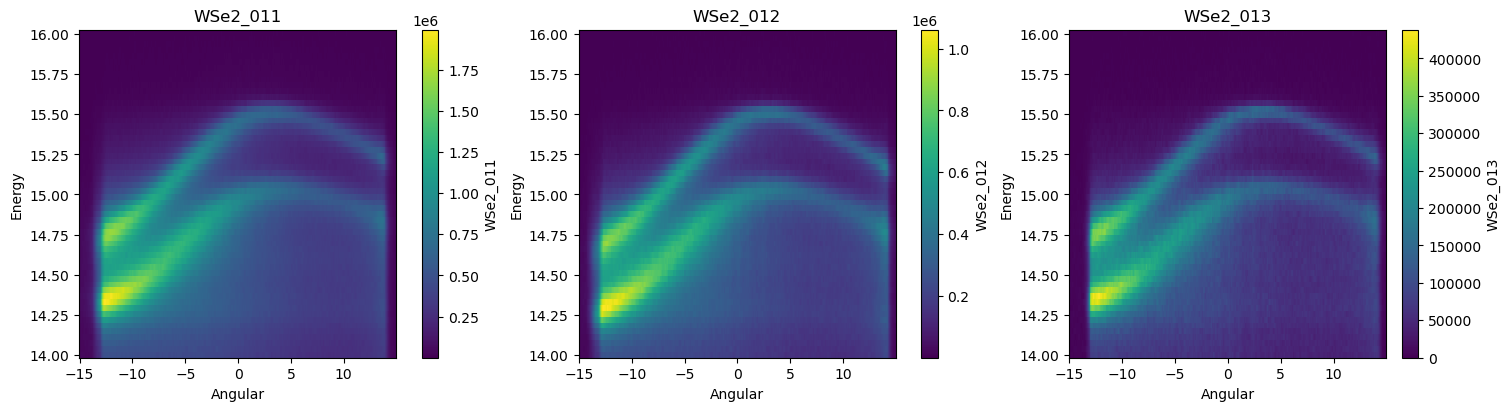

In [4]:

sp.load(datapath,name,11)
sp.edit()
da1=sp.data
sp.load(datapath,name,12)
sp.edit()
da2 = sp.data
sp.load(datapath,name,13)
sp.edit()
da3 = sp.data

fig, axes = plt.subplots(1, 3, figsize=(15, 4), constrained_layout=True)

da1.plot(ax=axes[0])
axes[0].set_title("WSe2_011")

da2.plot(ax=axes[1])
axes[1].set_title("WSe2_012")

da3.plot(ax=axes[2])
axes[2].set_title("WSe2_013")

plt.show()

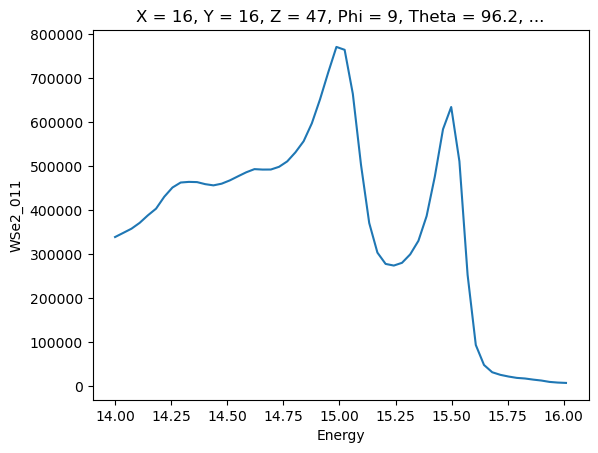

In [5]:
im=da1.sel(Angular=slice(0,5)).mean(dim="Angular")
im.plot()

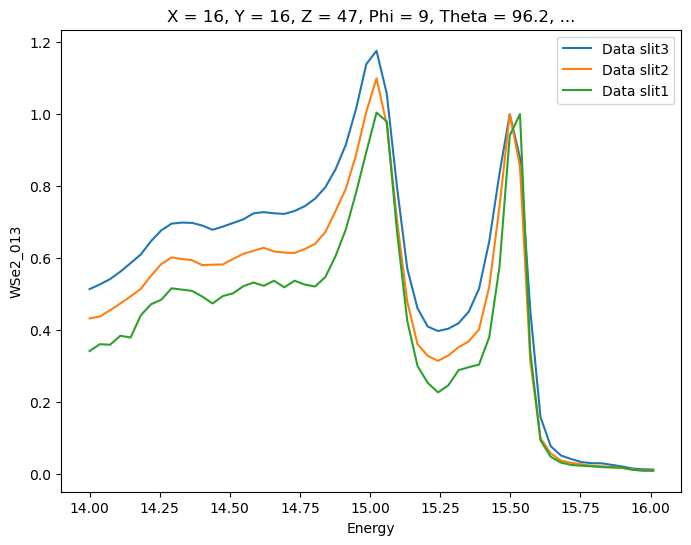

In [6]:
scans={'slit3':da1,
      'slit2':da2,
       'slit1':da3}
plt.figure(figsize=(8,6))
for name,n in scans.items():
    dummy=n.sel(Angular=slice(2,4)).mean(dim="Angular")
    dummy=dummy/dummy.sel(Energy=slice(15.25, 15.75)).max().values
    dummy.plot(label=f'Data {name}')
plt.legend()

In [7]:
da1

<xarray.DataArray 'WSe2_011' (Energy: 56, Angular: 356)>
array([[37809, 39420, 42019, ..., 28111, 26131, 25702],
       [38380, 37891, 35792, ..., 32395, 28711, 29688],
       [35032, 34855, 36040, ..., 29230, 28699, 27789],
       ...,
       [  393,  1189,  1735, ...,  2767,  2468,  2399],
       [ 1399,  1086,   669, ...,  2434,  2412,  2600],
       [ 1408,  2369,  2045, ...,  2659,  2839,  3075]], dtype=uint32)
Coordinates:
  * Energy   (Energy) float64 14.0 14.04 14.07 14.11 ... 15.9 15.94 15.97 16.01
  * Angular  (Angular) float64 -15.0 -14.92 -14.83 -14.75 ... 14.75 14.83 14.92
    X        int32 16
    Y        int32 16
    Z        int32 47
    Phi      int32 9
    Theta    float64 96.2
    Omega    int32 8
Attributes:
    note:     Ek=17.1331
Ep=20
Eph=21.2
DwellTime=100
Exposures=50
NumOfImage...